In [1]:
import tensorflow as tf

In [3]:
!pip install tensorflow-datasets

     ---------------------------------------- 5.4/5.4 MB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 126.4/126.4 kB ? eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 14.6 MB/s eta 0:00:00
     -------------------------------------- 101.3/101.3 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 223.6/223.6 kB 13.3 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21548 sha256=f469e44bcb9845ac0fa75735e3feed07f9227d6ea6599c7d152e5450344960fe
  Stored in directory: c:\users\usuário\appdata\local\pip\cache\wheels\76\40\54\417a4d64a01b61b247658d83597e1dc83c3de01fc0cef44972
Successfully built promise


In [4]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to C:\Users\Usuário\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

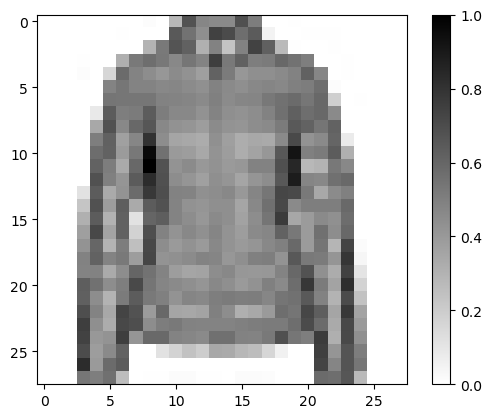

In [10]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

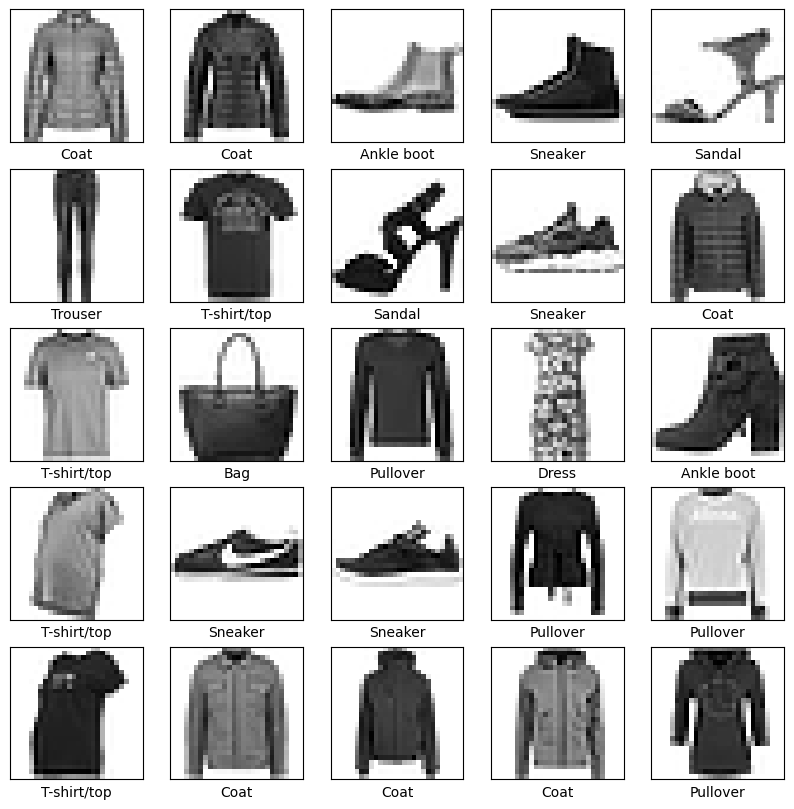

In [11]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4091 - accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2604 - accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2149 - accuracy: 0.9197
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1864 - accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1559 - accuracy: 0.9414
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1366 - accuracy: 0.9488
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1154 - accuracy: 0.9563
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1004 - accuracy: 0.9632
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0852 - accuracy: 0.9676
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.3439 - accuracy: 0.9160
Accuracy on test dataset: 0.9160000085830688


In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 100ms/step


In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([4.2214814e-09, 2.1918214e-10, 1.3105226e-04, 1.1335463e-10,
       8.1237841e-01, 1.6274562e-11, 1.8749051e-01, 6.1927392e-14,
       1.9976565e-10, 2.6101167e-13], dtype=float32)

In [20]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4

In [22]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

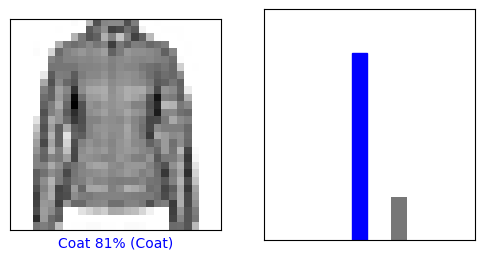

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

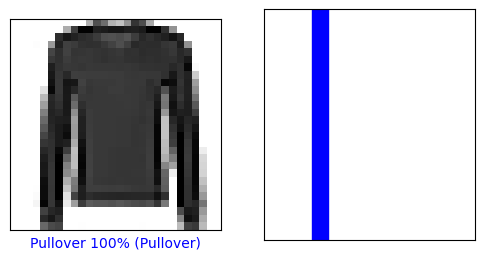

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

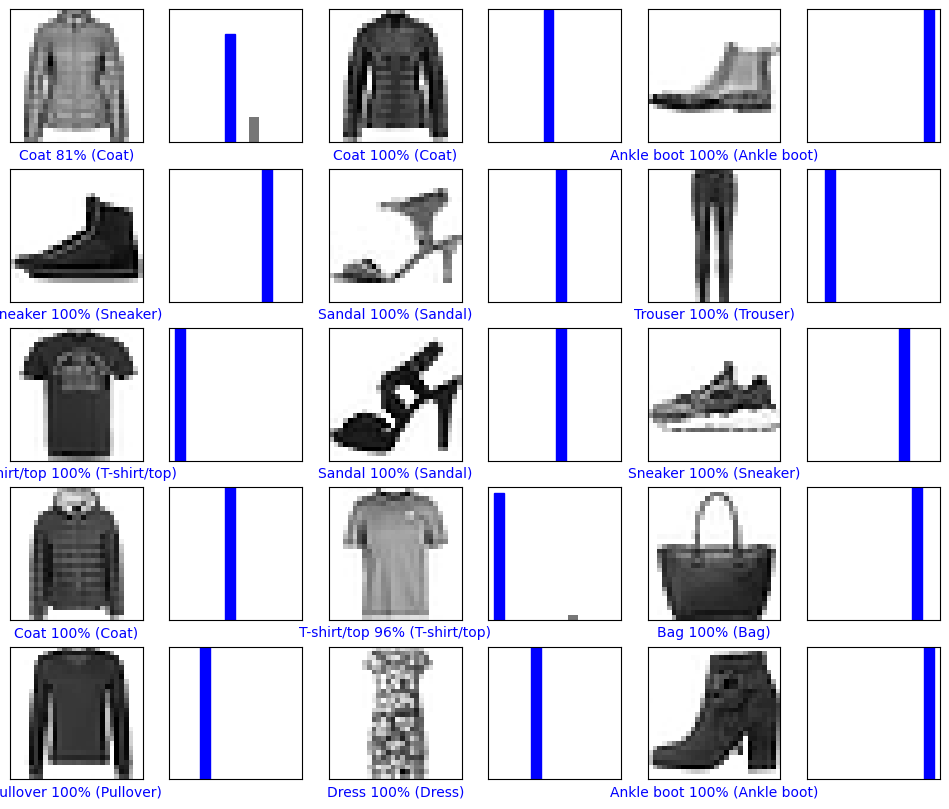

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [26]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [27]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 60ms/step
[[4.2214827e-09 2.1918180e-10 1.3105193e-04 1.1335402e-10 8.1237864e-01
  1.6274598e-11 1.8749030e-01 6.1927290e-14 1.9976570e-10 2.6101126e-13]]


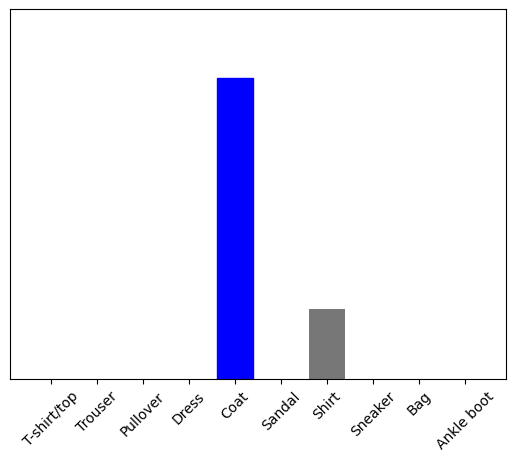

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

4

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:

Set training epochs set to 1
Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
Add additional Dense layers between the Flatten and the final Dense(10), experiment with different units in these layers
Don't normalize the pixel values, and see the effect that has
Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU). Also, if you run into trouble, simply reset the entire environment and start from the beginning:

Edit -> Clear all outputs
Runtime -> Reset all runtimes
